<a href="https://colab.research.google.com/github/MLandML/MLandML/blob/main/TF_lin_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data.data , data.target, test_size=0.33)

N,D = X_train.shape

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

"""model = tf.keras.models.Sequential()
   model.add(tf.keras.layers.Dense(1, input_shape(D,), activation = 'sigmoid'))"""

"model = tf.keras.models.Sequential()\n   model.add(tf.keras.layers.Dense(1, input_shape(D,), activation = 'sigmoid'))"

In [11]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

In [12]:
r = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100)

print("Train score: ",model.evaluate(X_train,y_train))
print("Test score: ",model.evaluate(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 1.0243 - accuracy: 0.4488 - val_loss: 1.0606 - val_accuracy: 0.4415
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9428 - accuracy: 0.4856 - val_loss: 0.9761 - val_accuracy: 0.4787
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8699 - accuracy: 0.5249 - val_loss: 0.8983 - val_accuracy: 0.5266
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8050 - accuracy: 0.5669 - val_loss: 0.8276 - val_accuracy: 0.5585
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7455 - accuracy: 0.6037 - val_loss: 0.7640 - val_accuracy: 0.5745
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.6378 - val_loss: 0.7070 - val_accuracy: 0.6011
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6450 - accuracy: 0.6535 - val_loss: 0.6555 - val_accuracy: 0.6436
Epoch 8/100


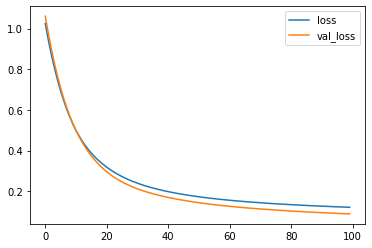

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

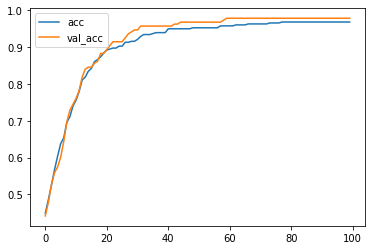

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label = 'acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()

In [15]:
P = model.predict(X_test)
print(P)

[[9.9766171e-01]
 [2.1344125e-03]
 [1.1089287e-04]
 [4.7585213e-01]
 [9.8318589e-01]
 [9.9639988e-01]
 [2.2287461e-01]
 [9.4287789e-01]
 [4.7739136e-06]
 [9.8268461e-01]
 [4.0909648e-04]
 [8.3390075e-01]
 [4.1159987e-04]
 [2.3102453e-01]
 [9.7456110e-01]
 [1.2518734e-02]
 [9.7717786e-01]
 [9.9435902e-01]
 [9.9341273e-01]
 [9.8736680e-01]
 [9.5324171e-01]
 [5.8455803e-06]
 [9.3037999e-01]
 [8.2030833e-02]
 [9.4671118e-01]
 [9.9860960e-01]
 [4.2178526e-06]
 [9.9950260e-01]
 [3.9580458e-01]
 [3.9143074e-01]
 [3.9789081e-04]
 [2.7891183e-01]
 [9.9846423e-01]
 [9.9659455e-01]
 [2.7642882e-01]
 [9.8224759e-01]
 [6.3609862e-01]
 [2.2087932e-02]
 [5.9419960e-02]
 [8.5615844e-01]
 [9.8197401e-01]
 [9.4896102e-01]
 [9.5077664e-01]
 [9.3857867e-01]
 [1.1771530e-02]
 [9.9480116e-01]
 [1.9432485e-02]
 [4.6738631e-01]
 [9.9123931e-01]
 [5.7069659e-02]
 [3.4699142e-03]
 [8.5188866e-01]
 [8.6850250e-01]
 [9.9826264e-01]
 [9.4111896e-01]
 [3.3750087e-02]
 [1.1798143e-03]
 [8.3182514e-01]
 [3.5748717e-0

In [16]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [17]:
print("manually calculated accuracy", np.mean(P == y_test))
print("evaluated accuracy", model.evaluate(X_test,y_test))

manually calculated accuracy 0.9787234042553191
6/6 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9787
evaluated accuracy [0.0881897434592247, 0.978723406791687]


In [20]:
model.save('lin_classification.h5')

In [21]:
!ls

lin_classification  lin_classification.h5  sample_data


In [23]:
model = tf.keras.models.load_model('lin_classification.h5')
print(model.layers)
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0882 - accuracy: 0.9787


[0.0881897434592247, 0.978723406791687]